In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## import and standardise data


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.iloc[5:]

,sepal length,sepal width,petal length,petal width,target
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']
#iloc  loc
# separating features
x = df.loc[:,feature]

# separating target
y = df.loc[:,'target']

#Standardising features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## 3. PCA execution and Projection to 2D

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)
#print(pct)
principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['target']]],axis=1)

In [6]:
finaldf

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [7]:
d_color = {"Iris-setosa":"r","Iris-virginica":"g","Iris-versicolor":"b"}
finaldf['color'] = finaldf['target'].apply(lambda x: d_color[x])
finaldf

,pc1,pc2,target,color
0,-2.264542,0.505704,Iris-setosa,r
1,-2.086426,-0.655405,Iris-setosa,r
2,-2.367950,-0.318477,Iris-setosa,r
3,-2.304197,-0.575368,Iris-setosa,r
4,-2.388777,0.674767,Iris-setosa,r
...,...,...,...,...
145,1.870522,0.382822,Iris-virginica,g
146,1.558492,-0.905314,Iris-virginica,g
147,1.520845,0.266795,Iris-virginica,g
148,1.376391,1.016362,Iris-virginica,g


Text(0, 0.5, 'Second principle component')

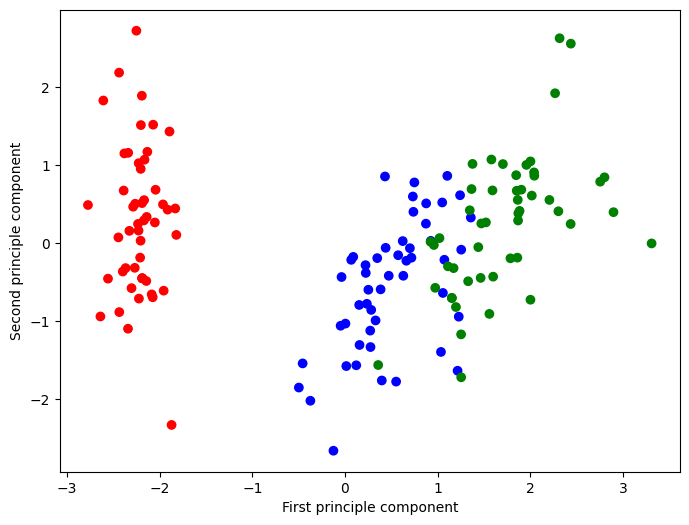

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(finaldf.iloc[:,0],finaldf.iloc[:,1],c=finaldf.color)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [9]:

pca.explained_variance_ratio_

array([0.72770452, 0.23030523])